In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

plt.style.use('default')

## **Problem 1 to 2:**

**Dataset link:** https://rb.gy/gsmddu

**Add a label to every axis and add a proper title for the charts (For every subplot, it is applicable). Also add proper labels if there are multiple representations.** Then, you can customize it as your wish.

### **Problem-1:** Make a subplots which have 2 plots.

- For the first chart, draw a scatter plot "*Monitored Cap.(MW)*" vs "*Total Cap. Under Maintenance (MW)*" of top 5 most frequent power stations. Then draw the lines which indicate the average values of these two columns. Change the colors according to the names of the Power Stations.
- For the second chart, draw a scatter plot "*Monitored Cap. (MW)*" vs "*Actual(MU)*" of the top 5 most frequent power stations. Also draw the lines which indicates the average values of these two columns. Change the colors according to the names of the Power Stations.


In [114]:
# code here
df = pd.read_csv('PowerGeneration.csv')
df.head(3)

,Dates,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme or Expected(MU),Actual(MU),Excess(+) / Shortfall (-),Deviation
0,2017-09-01,Delhi,2235.4,135.0,0.0,135.0,0,13,18,5.00,0.0
1,2017-09-01,Haryana,2720.0,2470.0,0.0,2470.0,0,28,7,-21.80,0.0
2,2017-09-01,Himachal Pradesh,3378.0,379.0,0.0,231.0,0,40,46,5.63,0.0


In [118]:
top_5 = df['Power Station'].value_counts().sort_values(ascending=False).head()
temp_df = df[df['Power Station'].isin(top_5.index)]
temp_df['Power Station cat'] = temp_df['Power Station'].replace({'NTPC Ltd.':0,'NHPC':1,'NPCIL':2,'GMR ENERG':3,'JSWEL':4})

C:\Users\Aniket\AppData\Local\Temp\ipykernel_20956\2887898006.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['Power Station cat'] = temp_df['Power Station'].replace({'NTPC Ltd.':0,'NHPC':1,'NPCIL':2,'GMR ENERG':3,'JSWEL':4})


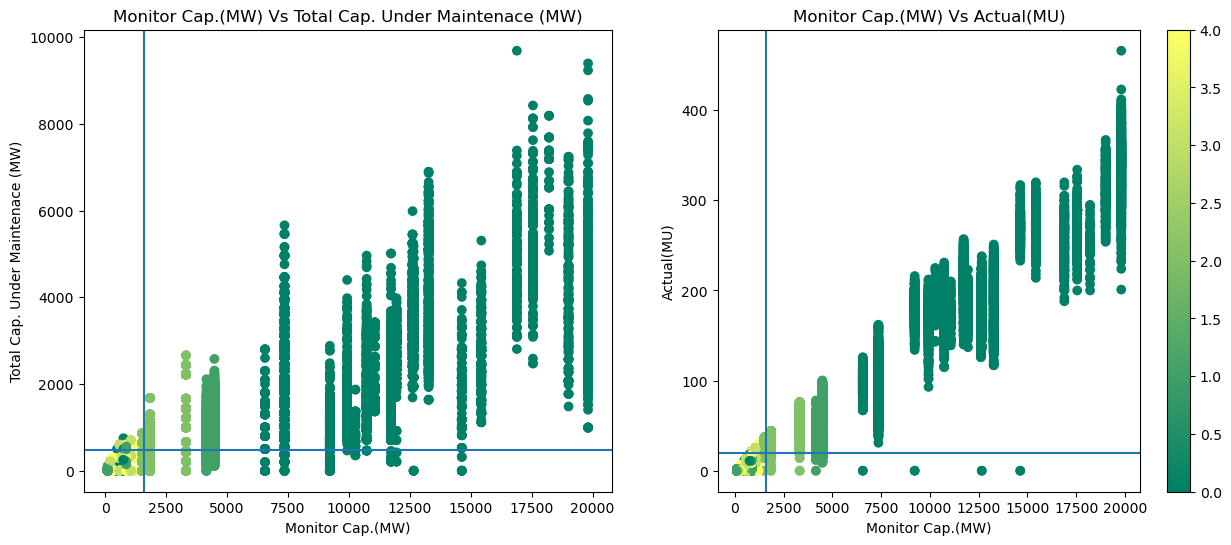

In [119]:
fig, ax = plt.subplots(1,2,figsize=(15,6),sharex=True)

ax[0].scatter(x=temp_df['Monitored Cap.(MW)'],y=temp_df['Total Cap. Under Maintenace (MW)'],c=temp_df['Power Station cat'],cmap='summer')
p = ax[1].scatter(x=temp_df['Monitored Cap.(MW)'],y=temp_df['Actual(MU)'],c=temp_df['Power Station cat'],cmap='summer')

ax[0].set_title('Monitor Cap.(MW) Vs Total Cap. Under Maintenace (MW)')
ax[0].set_ylabel('Total Cap. Under Maintenace (MW)')
ax[0].set_xlabel('Monitor Cap.(MW)')
ax[0].axhline(df['Total Cap. Under Maintenace (MW)'].mean())
ax[0].axvline(df['Monitored Cap.(MW)'].mean())

ax[1].set_title('Monitor Cap.(MW) Vs Actual(MU)')
ax[1].set_xlabel('Monitor Cap.(MW)')
ax[1].set_ylabel('Actual(MU)')
ax[1].axhline(df['Actual(MU)'].mean())
ax[1].axvline(df['Monitored Cap.(MW)'].mean())
plt.colorbar(p)


### **Problem-2:** Draw a 3D Scatter plot between "*Monitored Cap.(MW)*", "*Total Cap. Under Maintenace (MW)*" and "*Forced Maintanence(MW)*"

Text(0.5, 0, 'Forced Maintanence(MW)')

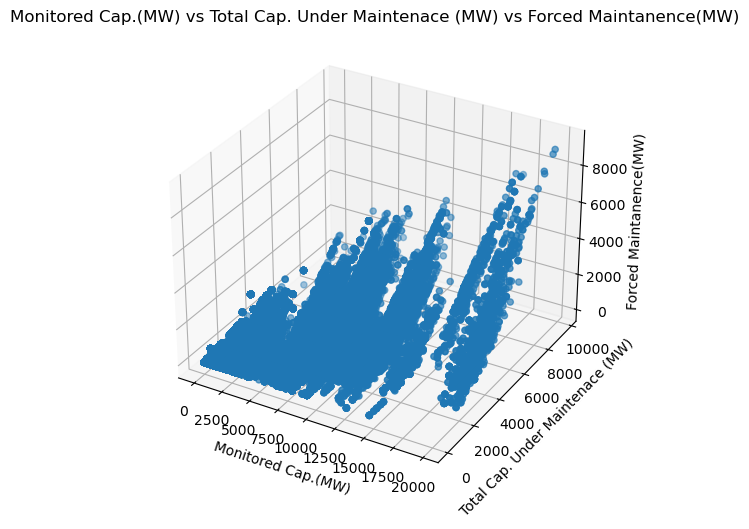

In [90]:
# code here
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(projection='3d')
ax.scatter3D(df['Monitored Cap.(MW)'],df['Total Cap. Under Maintenace (MW)'],df['Forced Maintanence(MW)'],cmap='summer')
ax.set_title('Monitored Cap.(MW) vs Total Cap. Under Maintenace (MW) vs Forced Maintanence(MW)')
ax.set_xlabel('Monitored Cap.(MW)')
ax.set_ylabel('Total Cap. Under Maintenace (MW)')
ax.set_zlabel('Forced Maintanence(MW)')

### **Problem-3:** Make a 3D *Surface* plot of this below mathematical equation.

$$z = |x| - |y|$$

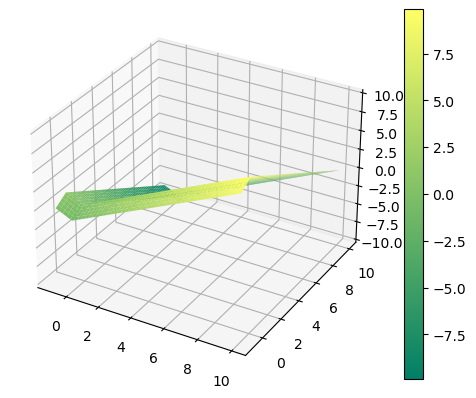

In [99]:
# code here
x = np.linspace(-1,10,100)
y = np.linspace(-1,10,100)
xx, yy = np.meshgrid(x,y)
z = abs(xx) - abs(yy)
ax = plt.subplot(projection='3d')
p = ax.plot_surface(xx,yy,z, cmap='summer')
plt.colorbar(p)

### **Problem-4:** Draw the 3D *Contour plot* of this below equation:

$$z = |x| - |y|$$

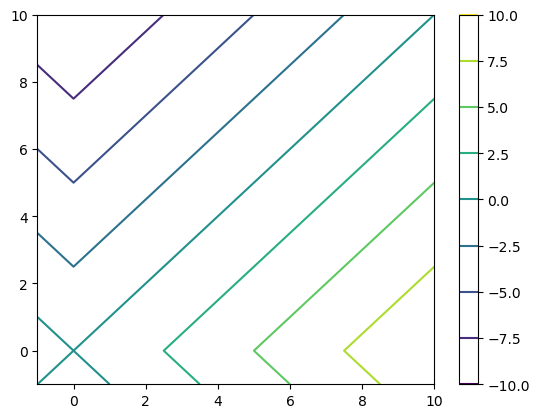

In [100]:
# code here
ax = plt.subplot()
p = ax.contour(xx,yy,z)
plt.colorbar(p)

### **Problem-5:** Draw a second type of Countour plot of the below equation:

$$z = |x| - |y|$$

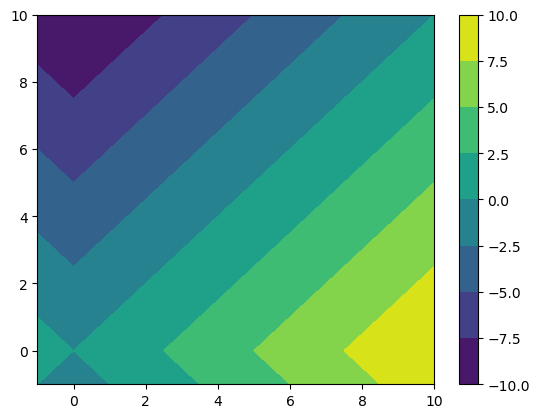

In [101]:
# code here
ax = plt.subplot()
p = ax.contourf(xx,yy,z)
plt.colorbar(p)

## `Problem 6-7`

Data Set Link - https://docs.google.com/spreadsheets/d/17tUL2yC7MGvo7txuuhLtAI-b6_C4jc0t7FLFxqRm-uI/edit?usp=share_link


**Description of Dataset:**

* Date: It gives the date of which stocks details are given.
* Symbol: Name of stock
* Open: It gives the opening price of stock on that date.
* High: It gives the highest price to which the stock ascened on that day.
* Low: It gives the highest price to which the stock plummeted on that day.
* Close: It gives the closing price of stock on that date.
* Volume: It gives the amount of stock traded on that date.
* VWAP: The volume-weighted average price (VWAP) is a statistic used by traders to determine what the average price is based on both price and volume.
* Turnover:

### `Problem-6` Use Pandas plot functions

* Line plot of closing value of top 5 Stocks in Year 2020.
* Take top 5 stocks based on total turnover in Year 2020

In [121]:
# code here
df = pd.read_csv('nifty-50.csv')
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades
0,2000-01-03,HDFCBANK,EQ,157.40,166.00,170.00,166.00,170.00,170.00,169.52,33259,5.638122e+11,NaN
1,2000-01-04,HDFCBANK,EQ,170.00,182.00,183.45,171.00,174.00,173.80,174.99,168710,2.952261e+12,NaN
2,2000-01-05,HDFCBANK,EQ,173.80,170.00,173.90,165.00,168.00,166.95,169.20,159820,2.704094e+12,NaN
3,2000-01-06,HDFCBANK,EQ,166.95,168.00,170.00,165.30,168.95,168.30,168.44,85026,1.432166e+12,NaN
4,2000-01-07,HDFCBANK,EQ,168.30,162.15,171.00,162.15,170.75,168.35,166.79,85144,1.420158e+12,NaN


<AxesSubplot:title={'center':'Closing Price of Top 5 Stocks in 2020'}, xlabel='Date', ylabel='Closing Price'>

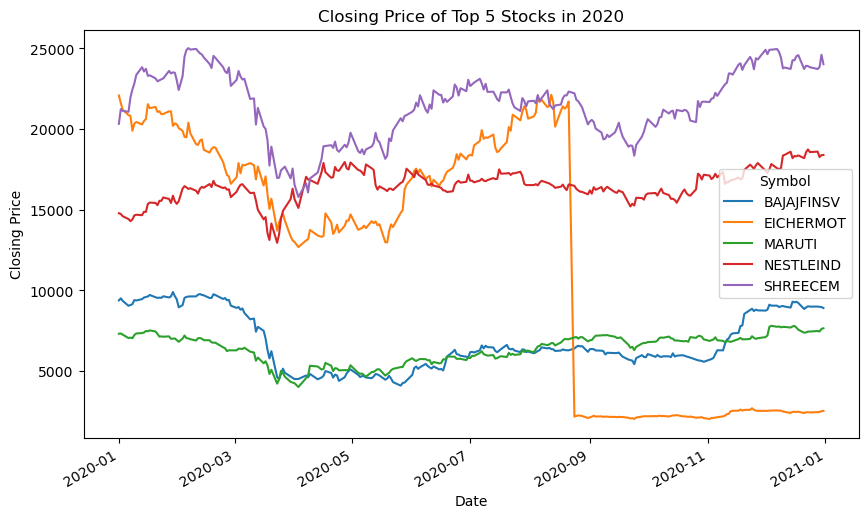

In [146]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
top_5 = df[df['Year'] == 2020].groupby('Symbol')['Close'].sum().sort_values(ascending=False).head()
df[(df['Year'] == 2020) & (df['Symbol'].isin(top_5.index))].pivot_table(index='Symbol',columns='Date',values='Close').swapaxes(axis1=1,axis2=0).plot(kind='line',figsize=(10,6),title='Closing Price of Top 5 Stocks in 2020',ylabel='Closing Price',xlabel='Date')

<AxesSubplot:title={'center':'Total Turnover of Top 5 Stocks in 2020'}, xlabel='Date', ylabel='Closing Price'>

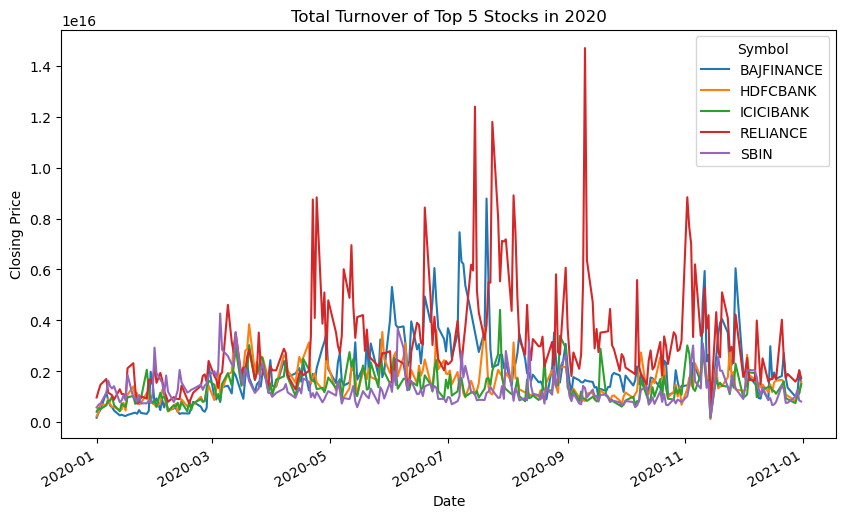

In [156]:
top_5 = df[df['Year'] == 2020].groupby('Symbol')['Turnover'].sum().sort_values(ascending=False).head()
df[(df['Year'] == 2020) & (df['Symbol'].isin(top_5.index))].pivot_table(index='Symbol',columns='Date',values='Turnover').swapaxes(axis1=1,axis2=0).plot(kind='line',figsize=(10,6),title='Total Turnover of Top 5 Stocks in 2020',ylabel='Closing Price',xlabel='Date')

### `Problem-7` Scatter plot Close price vs Volume for TOP-5 Stocks in year 2021
* Color on Symbol Column

C:\Users\Aniket\AppData\Local\Temp\ipykernel_20956\3950235274.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['Symbol'] = temp_df['Symbol'].replace({'HDFCBANK':0,'TATASTEEL':1, 'SBIN':2, 'RELIANCE':3, 'TATAMOTORS':4})


<AxesSubplot:xlabel='Close', ylabel='Volume'>

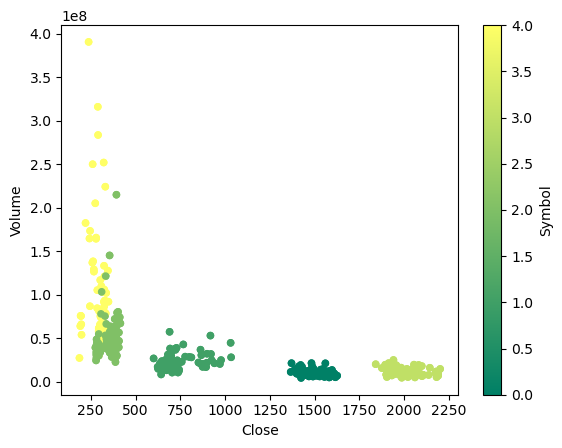

In [203]:
# code here
top_5 = df[(df['Year'] == 2021)].groupby('Symbol')['Turnover'].sum().sort_values().tail()
temp_df = df[(df['Year'] == 2021) & (df['Symbol'].isin(top_5.index))]
temp_df['Symbol'] = temp_df['Symbol'].replace({'HDFCBANK':0,'TATASTEEL':1, 'SBIN':2, 'RELIANCE':3, 'TATAMOTORS':4})
temp_df.plot(kind='scatter',x='Close',y='Volume',c='Symbol',cmap='summer')

### `Problem-8` Create a 3-D Scatter Plot using `time,x,y` on below synthetic data. and give color gradiant on `z`
```
# Create a 3D dataset
time = np.linspace(0, 10, 100)
x = np.sin(time)
y = np.cos(time)
z = time

# Create a DataFrame from the dataset
data = pd.DataFrame({'time': time, 'x': x, 'y': y, 'z': z})
```

In [ ]:
# code here

### `Problem 9:` Create a surface plot and the 2 types of the contour plots of the below equation.

$$z = sin(\sqrt{x^2 + y^2})$$


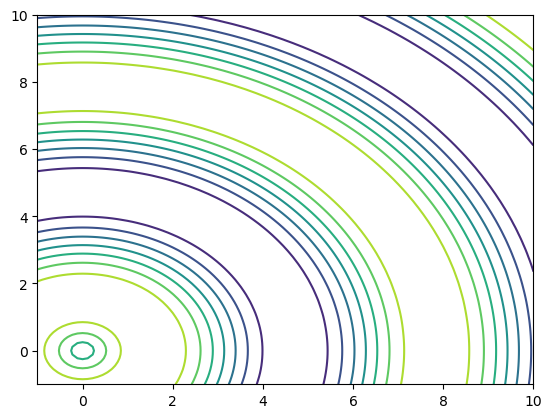

In [210]:
# code here
x = np.linspace(-1,10,100)
y = np.linspace(-1,10,100)
xx, yy = np.meshgrid(x,y)
z = np.sin(((xx**2) + (yy**2))**0.5)
ax = plt.subplot()
ax.contour(xx,yy,z)

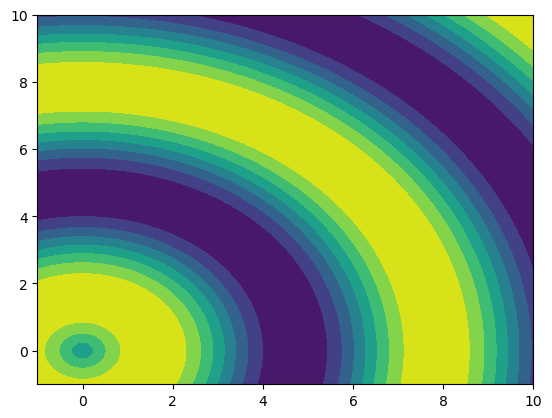

In [213]:
ax = plt.subplot()
ax.contourf(xx,yy,z)

### `Problem 10:` Create a surface plot and the 2 types of the contour plots of the below equation.

$$z = tan(\log_2({x^2 + y^2})$$

C:\Users\Aniket\AppData\Local\Temp\ipykernel_20956\2368747393.py:2: RuntimeWarning: divide by zero encountered in log2
  z = np.tan(np.log2((xx**2) + (yy**2)))
C:\Users\Aniket\AppData\Local\Temp\ipykernel_20956\2368747393.py:2: RuntimeWarning: invalid value encountered in tan
  z = np.tan(np.log2((xx**2) + (yy**2)))


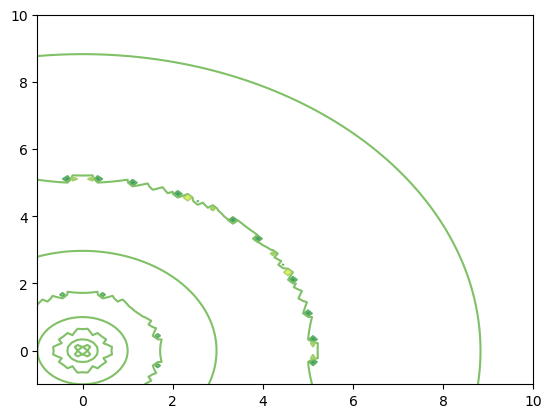

In [214]:
# code here
z = np.tan(np.log2((xx**2) + (yy**2)))
ax = plt.subplot()
ax.contour(xx,yy,z,cmap='summer')

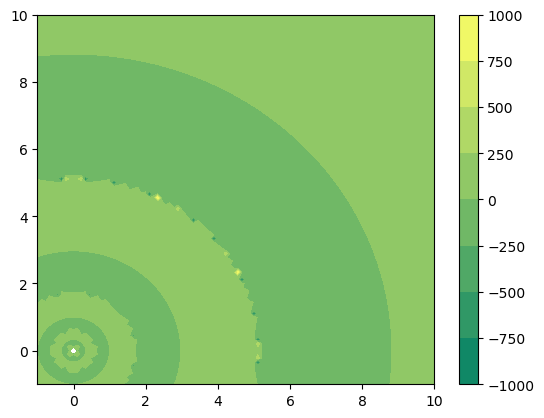

In [216]:
ax = plt.subplot()
p = ax.contourf(xx,yy,z,cmap='summer')
plt.colorbar(p)